<a href="https://colab.research.google.com/github/seokhee516/kaggle-practice/blob/main/Binary%20classification/Porto%20Seguro%E2%80%99s%20Safe%20Driver%20Prediction/Data%20Preparation%20%26%20Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gcsfs

     |████████████████████████████████| 1.3 MB 6.1 MB/s 
     |████████████████████████████████| 123 kB 47.9 MB/s 
     |████████████████████████████████| 142 kB 36.0 MB/s 
     |████████████████████████████████| 294 kB 62.1 MB/s 


# 소개
이 노트북은 PortoSeguro 대회의 데이터에 대한 통찰력을 얻는 것을 목표로 함

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures # 교호작용 변수 생성 (중요한 변수끼리의 곱)
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold # FeatureSelection에서 분산이 기준치보다 낮은 feature 탈락
from sklearn.feature_selection import SelectFromModel # Feature Importance를 제공하는 모델의 importance를 활용하여 변수선택
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer # 결측치 대체를 위한 라이브러리

pd.set_option('display.max_columns', 100)

In [ ]:
GCS_DS_PATH = "gs://kds-f587dab290d7a2c5b918fa54fd3ca6a8d489a870ddbf6c03145d6964"
train = pd.read_csv(GCS_DS_PATH+'/train.csv')
test = pd.read_csv(GCS_DS_PATH+"/test.csv")

In [ ]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [ ]:
train.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.1,0.2,-1.000000,7,0,-1,0,-1,0,1,0,2,1,34,2,0.400000,0.932649,0.378021,3.741657,0.4,0.0,0.5,2,3,10,4,10,2,5,4,4,3,8,0,1,0,0,0,0


In [ ]:
# 데이터의 행과 열을 확인
# 타겟과 id를 제외한 58개의 feature가 존재
# 특이한 점은 train set이 test set보다 적다
train.shape

(595212, 59)

In [ ]:
train.drop_duplicates()
train.shape

(595212, 59)

In [ ]:
test.shape

(892816, 58)

In [ ]:
import missingno as msno # 결측치 시각화 라이브러리
msno.matrix(df=train.iloc[:,:40], figsize=(14, 10))

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

데이터 형태의 종류를 간단하게 살펴본다.
- Binary 변수
- 정수로 이루어진 Categorical 변수 (집값예측과 비슷, 범주형이지만 일단 인코딩이 필요해 보이진 않는다.)
- 나머지 변수는 int와 float으로 이루어져 있음
- Null 값은 -1로 이루어져 있으므로 isnull()로 확인되지 않음

### Metadata
금메달 상위 커널인 'Data Prepraration&Exploration'은 아래와 같은 방법으로 데이터를 정리해두었다.

FE, Visualization에서 편하게 데이터를 사용할 수 있는 꿀팁인듯
- 데이터의 역할: input, ID, target
- 데이터의 레벨: nominal, interval, ordinal, binary
- 버릴지 안버릴지: True or False(아래의 경우는 id 변수만 버리고 나머지는 가져감)
- 데이터의 타입: int, float, str

In [ ]:
# append를 위해 빈 리스트를 만들어주었음
data = []
for f in train.columns:
  # 데이터의 역할을 지정 (독립변수, 종속변수, id(PM))
  if f == 'target':
    role = 'target'
  elif f == 'id':
    role = 'id'
  else:
    role = 'input'
  # 데이터의 레벨을 지정 (명목변수, 간격변수, 순서변수 등을 레벨이라고 표현한듯)
  if 'bin' in f or f =='target':
    level = 'binary'
  elif 'cat' in f or f == 'id':
    level = 'nominal'
  elif train[f].dtype == float:
    level = 'interval'
  elif train[f].dtype == int:
    level = 'ordinal'
  # id는 False로 지정해주어 버리기로 하고, 나머지는 True로 가져감
  keep = True
  if f == 'id':
    keep = False
  # 데이터 타입 지정
  dtype = train[f].dtype
  # DataFrame으로 만들기 위해 리스트에 append하기 전에 딕셔너리 타입으로 만들어 주었음
  f_dict = {
      'varname' : f,
      'role' : role,
      'level' : level,
      'keep' : keep,
      'dtype' : dtype
  }
  data.append(f_dict)
# 변수의 이름을 인덱스로 하는 데이터프레임을 만들어줌
meta = pd.DataFrame(data, columns = ['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

In [ ]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


위의 방법대로 만들어서 어떤식으로 활용할 수 있는가?  
ex1. 버리지 않을 변수 중에서 nominal(명목형 변수)만 확인해보고 싶다.  
ex2. 각 레벨의 역할과 레벨에 해당하는 변수가 몇개가 있는지 확인해보고 싶다.  

이러한 정리를 통해 유형별로 데이터를 어떻게 다룰 것인가를 쉽게 선택할 수 있음  
ex. 연속형 변수의 경우 통계적 방법, 범주형 변수의 경우 시각화를 통한 탐색 등  

In [ ]:
# ex1
meta[(meta.level == 'nominal') & (meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

In [ ]:
# ex2
pd.DataFrame({'count':meta.groupby(['role', 'level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


# EDA

Interval 변수

In [ ]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
# describe를 통해 interval 변수들의 통계량을 확인
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


위의 통계량을 바탕으로 interval 데이터를 살펴보자   
1) 결측치 확인 
- porto 대회의 결측치는 전부 -1로 대체되어 있다.
- 위의 통계량을 보면 min값이 -1인 변수가 몇개 존재한다.
- ps_reg_03, ps_car_12, ps_car_14 (calc 변수는 결측치x)  

2) 변수들 사이의 범위 확인
- 범위를 확인해보면 변수들 간의 차이가 있지만 커보이지는 않는다.
- scailng을 할지 말지 추후에 생각해보도록 한다.(아마 트리모델을 사용할것이기 때문에 딱히...)  

3) 변수들의 숫자 크기 확인
- 어떤 변수인지 확인할 수는 없지만 변수의 크기가 전부 작은 것으로 보인다.
- 이 커널을 작성한 사람은 Log를 씌워준게 아닌가 라고 생각했다.

In [ ]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
train[v].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


위의 통계량을 바탕으로 ordinal 데이터를 살펴보자

1) 결측치 확인 
- min 값이 -1dls 변수가 한개 존재한다.
- ps_car_11(나머지는 결측치x)

2) 변수들 사이의 범위 확인
- ordinal 데이터 또한 범위를 확인해보면 변수들 간의 차이가 있지만 커보이지는 않는다.

In [ ]:
v = meta[(meta.level == 'binary') & (meta.keep)].index
train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


위의 통계량을 바탕으로 Binary 데이터를 살펴보자

1) 결측치 확인
- 결측치 X

2) 변수들 사이의 범위 확인
- Binary 데이터이기 때문에 범위를 확인할 필요는 없다.(0 or 1)

3) Target 변수 확인
- Binary에는 Target 변수까지 포함되어 있다.
- 그렇기 때문에 Target 변수에 대한 통계량을 확실하게 짚고 가야한다.
- Target 데이터의 평균을 살펴보면 이 대회의 핵심을 알 수 있다.
- 데이터는 0 or 1이기 때문에 균형이 맞기 위해선 평균이 0.5가 되어야 한다.
- 하지만 Target 데이터의 평균은 0.0354로 보인다.(굉장이 imbalanced 하다. 0이 훨씬 많아보인다.)
- 대회의 Metric으로 Normalized Gini Coefficient를 사용하는 이유

# Handling imbalanced classes

#### Imbalanced Class 처리
- 보험이라는 도메인 특성상 불균형적인 타겟값은 사실 일반적이다.
- 보험을 청구하는 경우 (1)보다 하지 않는 경우(0)이 굉장히 많은 것을 위에서 확인하였다
- imbalanced한 데이터는 일반적으로 Undersampling 혹은 Oversampling으로 처리한다. 
- UnderSampling: 0이 1보다 훨씬 많으므로 0인 데이터를 줄여 균형을 맞춘다.
- OverSampling: 1인 데이터를 늘려 균형을 맞추다
- 선택방법: 본인의 결정이지만 보통 데이터셋의 크기를 기준으로 한다.  
데이터가 너무 많으면, 오버샘플링 시 너무 많은 cost(시간, 컴퓨팅 파워)가 들어가게 된다.  
이 커널은 데이터가 많은 편이라고 판단하여 언더 샘플링을 수행하였다.



In [ ]:
f, ax = plt.subplots(figsize = (8,8))

df_train['target'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', 
                                               shadow = True, colors = ['lightcoral', 'lightskyblue'],
                                              textprops={'fontsize': 18})
plt.title("Target PiePlot", size = 20)

In [ ]:
# 언더샘플링 비율을 지정해주기 위함
desired_apriori=0.10

# target 변수의 클래스에 따른 
idx_0 = train[train.target == 0].index
idx_1 = train[train.target == 1].index

nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

undersampling_rate = ((1-desired_apriori)*nb_1)/(nb_0*desired_apriori)
undersampled_nb_0 = int(undersampling_rate*nb_0)
print('Rate to undersample records with target=0: {}'.format(undersampling_rate))
print('Number of records with target=0 after undersampling: {}'.format(undersampled_nb_0))

undersampled_idx = shuffle(idx_0, random_state=37, n_samples=undersampled_nb_0)
idx_list = list(undersampled_idx) +list(idx_1)

train = train.loc[idx_list].reset_index(drop=True)

Rate to undersample records with target=0: 0.34043569687437886
Number of records with target=0 after undersampling: 195246


# Data Quality Checks

## Checking missing values

In [ ]:
vars_with_missing = []

for f in train.columns:
  missings = train[train[f] == -1][f].count()
  #missings = train[train[f]==-1][f].count()
  if missings > 0:
    vars_with_missing.append(f)
    missings_perc = missings/train.shape[0]

    print('Variable {} has {} records ({:.2%}) with missimg values'.format(f,missings, missings_perc))

print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

Variable ps_ind_02_cat has 103 records (0.05%) with missimg values
Variable ps_ind_04_cat has 51 records (0.02%) with missimg values
Variable ps_ind_05_cat has 2256 records (1.04%) with missimg values
Variable ps_reg_03 has 38580 records (17.78%) with missimg values
Variable ps_car_01_cat has 62 records (0.03%) with missimg values
Variable ps_car_02_cat has 2 records (0.00%) with missimg values
Variable ps_car_03_cat has 148367 records (68.39%) with missimg values
Variable ps_car_05_cat has 96026 records (44.26%) with missimg values
Variable ps_car_07_cat has 4431 records (2.04%) with missimg values
Variable ps_car_09_cat has 230 records (0.11%) with missimg values
Variable ps_car_11 has 1 records (0.00%) with missimg values
Variable ps_car_14 has 15726 records (7.25%) with missimg values
In total, there are 12 variables with missing values


In [ ]:
# Dropping the variables with too many missing values
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
train.drop(vars_to_drop, inplace=True, axis=1)
meta.loc[(vars_to_drop),'keep'] = False

In [ ]:
# Imputing with the mean or mode
# pandas.Series.ravel : Return the flattened ubderlying data as an ndarray
mean_imp =SimpleImputer(missing_values = -1, strategy='mean')
mean_imp =SimpleImputer(missing_values = -1, strategy='most_frequent')
train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_12'] = mean_imp.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mean_imp.fit_transform(train[['ps_car_11']]).ravel()

## Checking the cardinality of the categorical variables(복습 필요)

In [ ]:
v = meta[(meta.level=='nomial') & (meta.keep)].index

for f in v:
  dist_values = train[f].value_counts().shape[0]
  print('Variable {} has {} distinct values'.format(f, dist_values))

In [ ]:
def add_noise(series, noise_level):
  return series * (1 + noise_level * np.random.randn(len(series)))

def target_encod(trn_series = None,
                 tst_series = None,
                 target = None,
                 min_samples_leaf = 1,
                 smoothing = 1,
                 noise_level = 0):
  assert len(trn_series) == len(target)
  # assert True -> pass, False -> error
  assert trn_series.name == tst_series.name
  temp = pd.concat([trn_series, target], axis=1)
  averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
  # groupby -> category가  많을 때, 주로 사용 (많은 사람들 사용하는 방법)
  smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
  # exp는 distribution 곡선 깔끔하게 정리
  prior = target.mean()
  # prior 원래 target이 가지고 있던 평균값
  averages[target.name] = prior * (1-smoothing) + averages["mean"] * smoothing
  averages.drop(["mean", "count"], axis=1, inplace=True)
  # averages 우리가 얻고 싶은 것
  ft_trn_series = pd.merge(
      trn_series.to_frame(trn_series.name),
      averages.reset_index().rename(columns={'index':target.name, target.name:'average'}),
      on=trn_series.name,
      how='left'
  )['average'].rename(trn_series.name + '_mean').fillna(prior)
  ft_trn_series.index = trn_series.index
  ft_tst_series = pd.merge(
      tst_series.to_frame(tst_series.name),
      averages.reset_index().rename(columns={'index':target.name, target.name:'average'}),
      on=tst_series.name,
      how='left'
  )['average'].rename(trn_series.name + '_mean').fillna(prior)
  ft_tst_series.index = tst_series.index
  return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [ ]:
train_encoded, test_encoded = target_encod(train["ps_car_11_cat"], 
                                           test["ps_car_11_cat"],
                                           target = train.target,
                                           min_samples_leaf = 100,
                                           smoothing = 10,
                                           noise_level = 0.01)
train['ps_car_11_cat_te'] = train_encoded
train.drop('ps_car_11_cat', axis=1, inplace=True)
meta.loc['ps_car_11_cat', 'keep'] = False
test['ps_car_11_cat_te'] =test_encoded
test.drop('ps_car_11_cat', axis=1, inplace=True)

# Exploratory Data Visualization

## Categorical variables

In [ ]:
v = meta[(meta.level == 'nomial') & (meta.keep)].index

<Figure size 432x288 with 0 Axes>

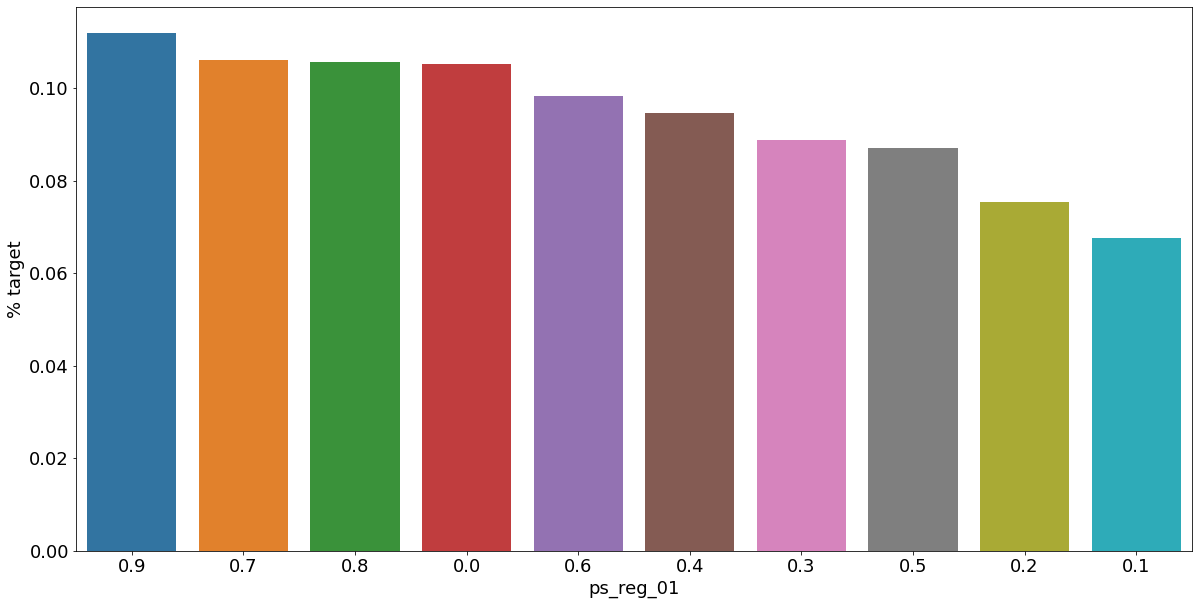

<Figure size 432x288 with 0 Axes>

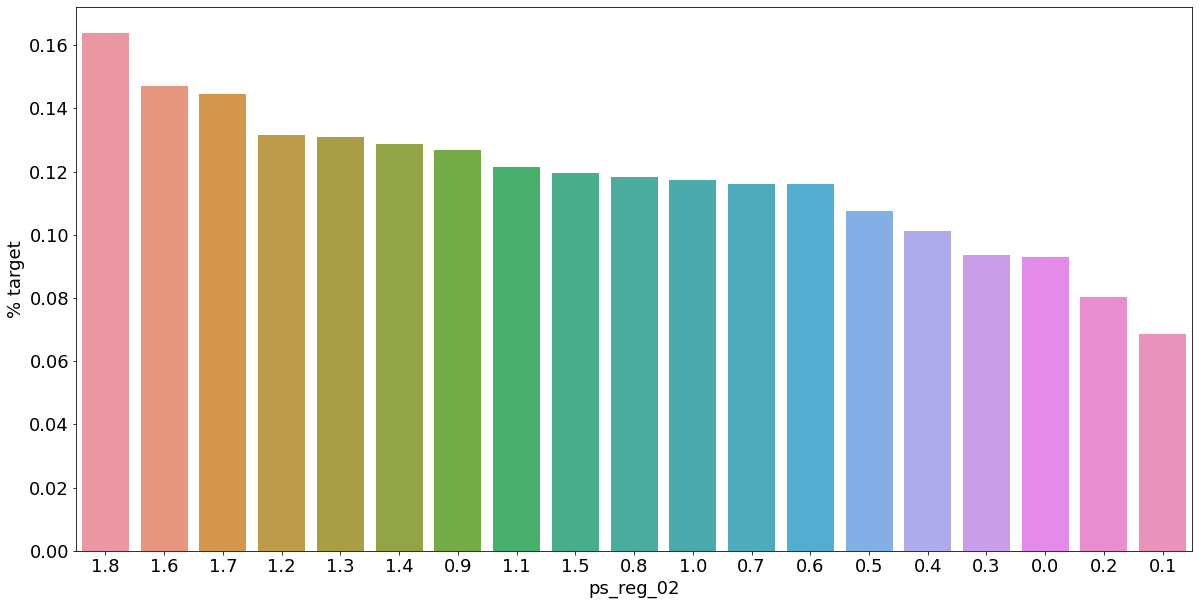

<Figure size 432x288 with 0 Axes>

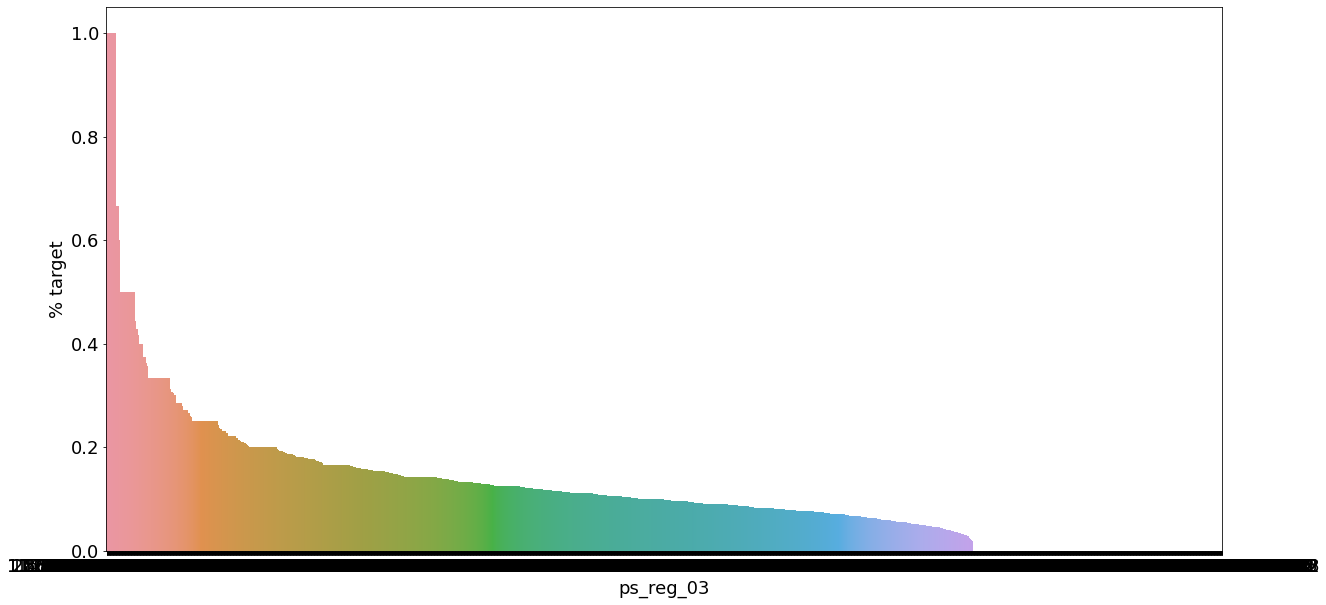

<Figure size 432x288 with 0 Axes>

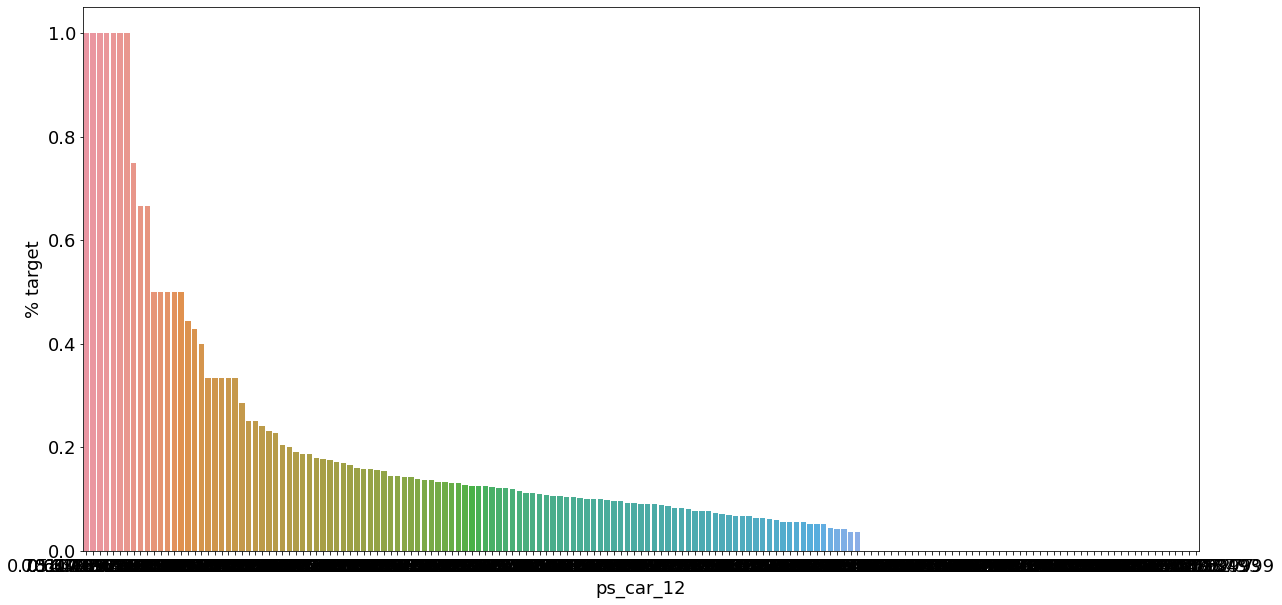

<Figure size 432x288 with 0 Axes>

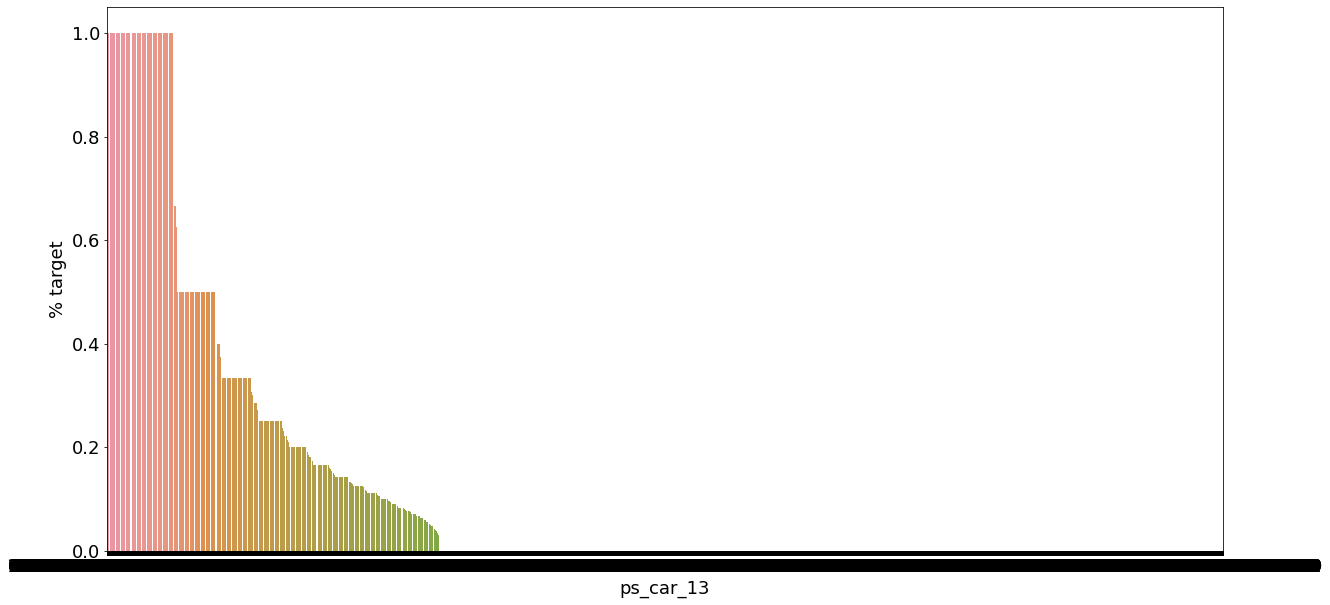

<Figure size 432x288 with 0 Axes>

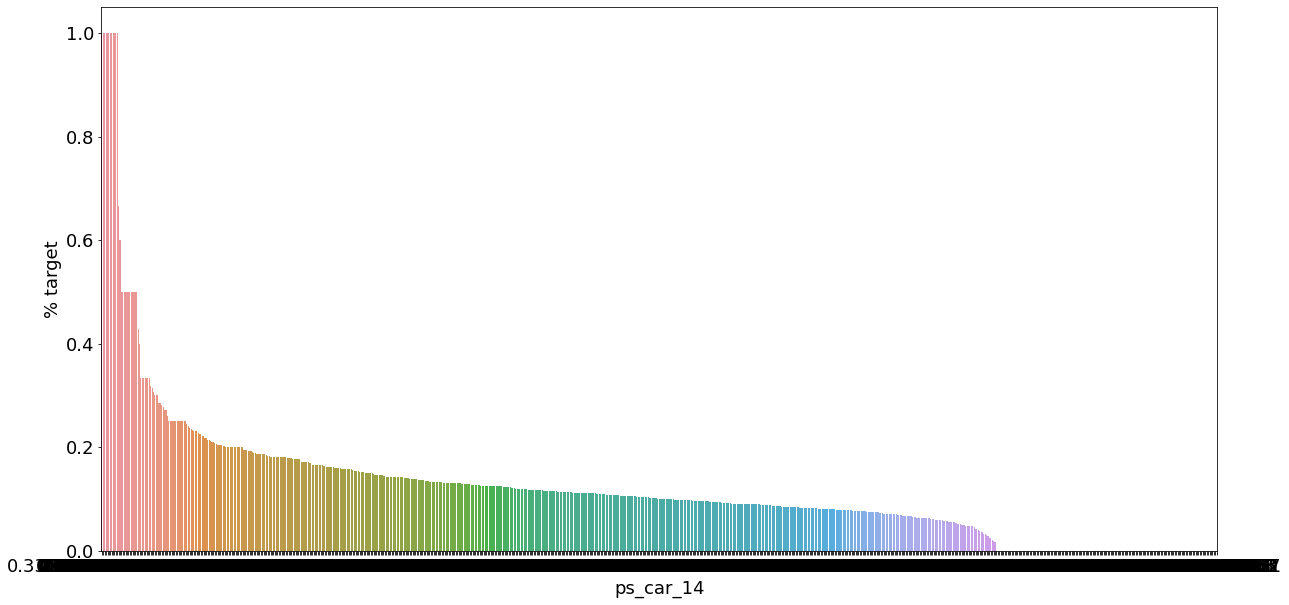

<Figure size 432x288 with 0 Axes>

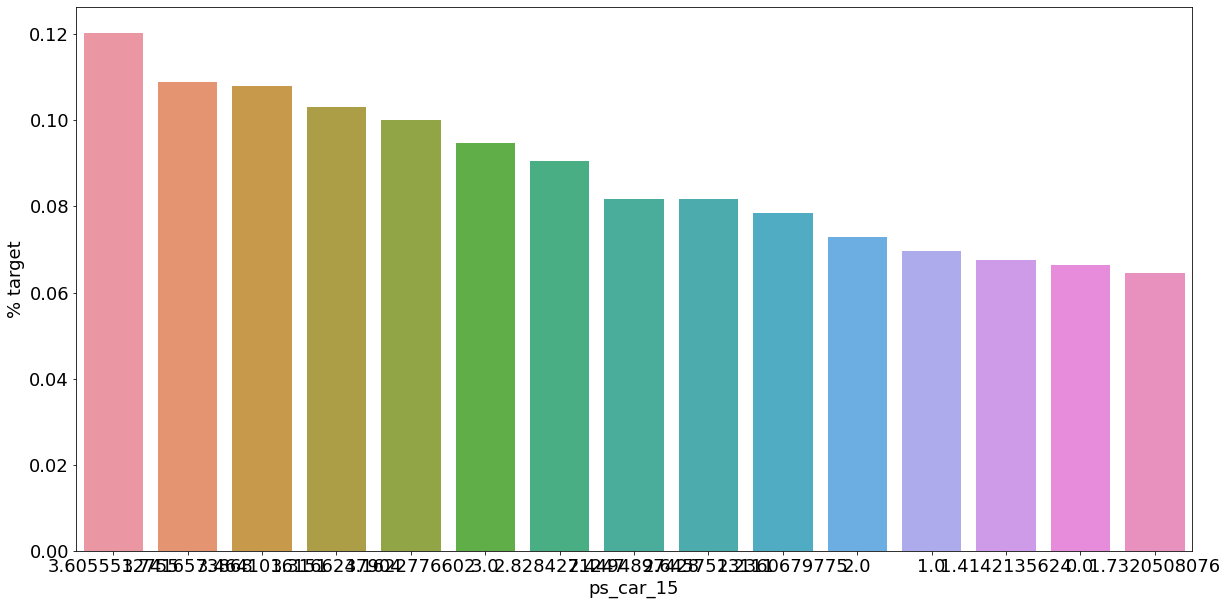

<Figure size 432x288 with 0 Axes>

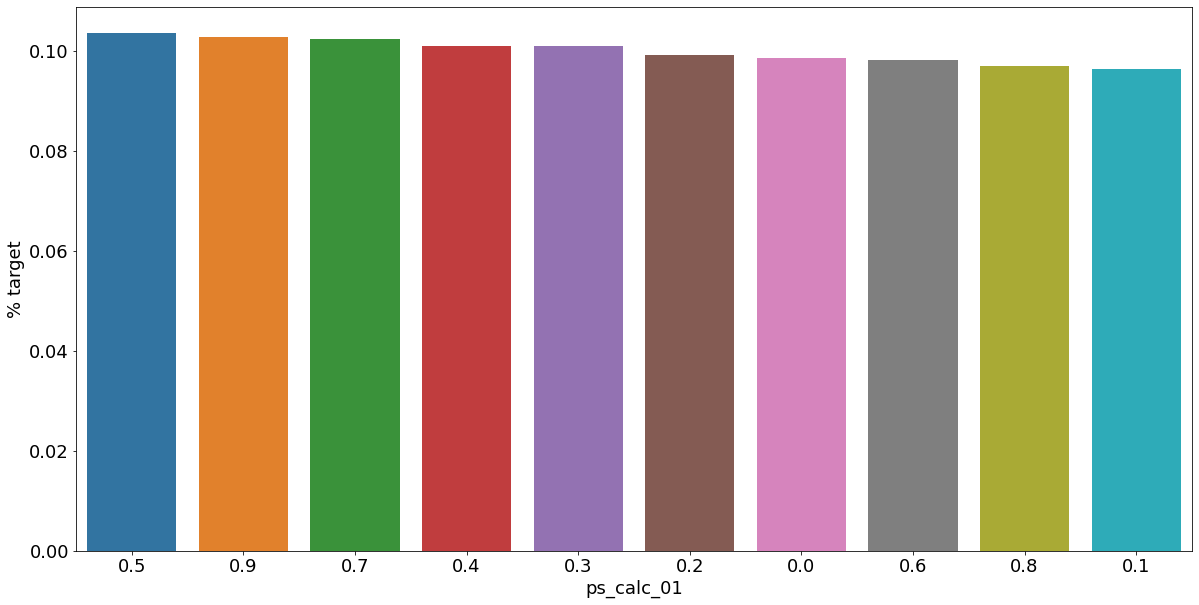

<Figure size 432x288 with 0 Axes>

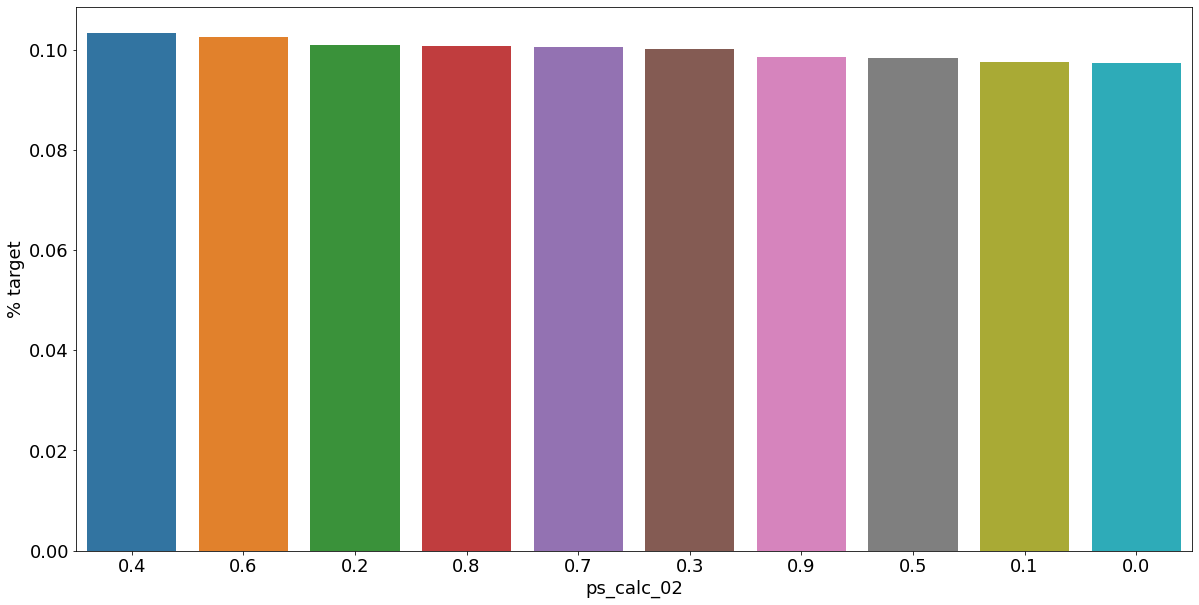

<Figure size 432x288 with 0 Axes>

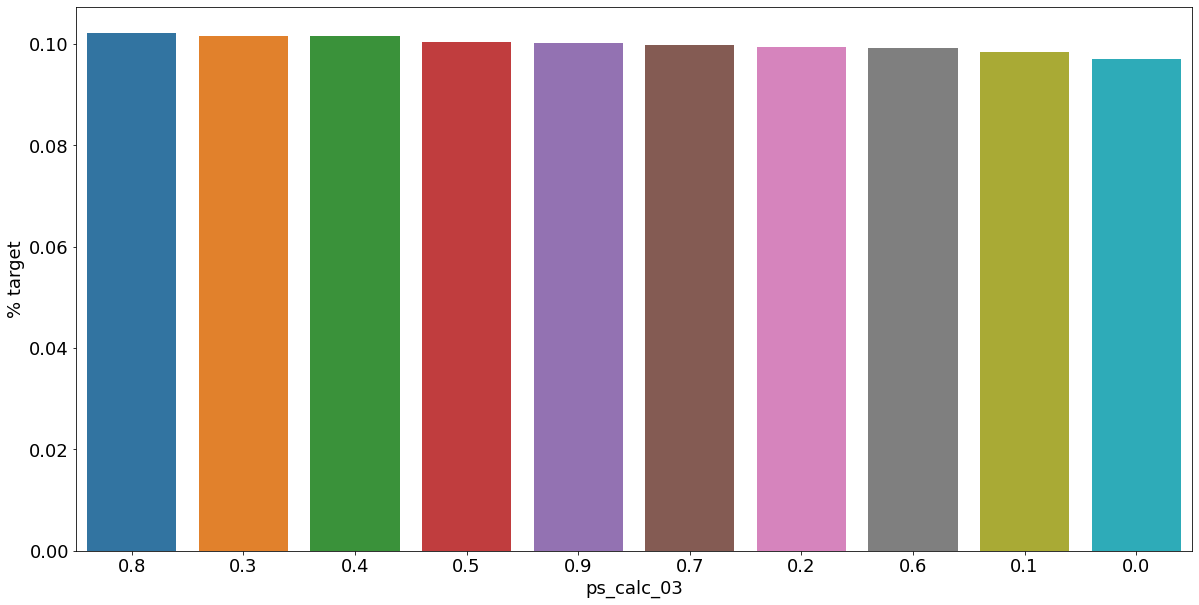

In [ ]:
for f in v:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20,10))
    # Calculate the percentage of target=1 per category value
    cat_perc = train[[f, 'target']].groupby([f],as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    # Bar plot
    # Order the bars descending on target mean
    sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show();

## Interval variables

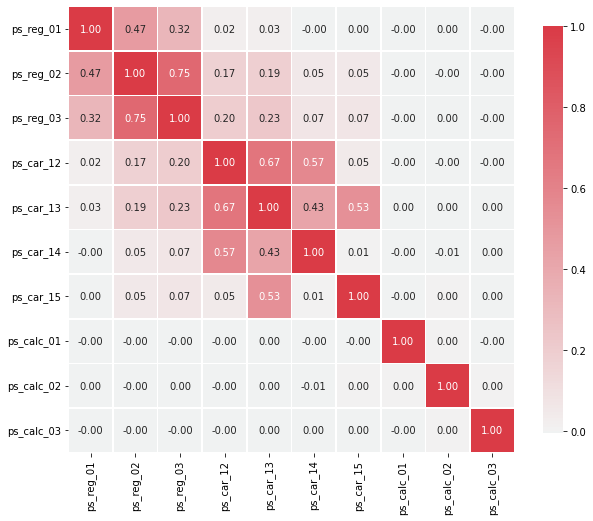

In [ ]:
def corr_heatmap(v):
  correlations = train[v].corr()
  cmap = sns.diverging_palette(220, 10, as_cmap=True)

  fig, ax = plt.subplots(figsize=(10,10))
  sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
              square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
  plt.show();

v = meta[(meta.level=='interval') & (meta.keep)].index
corr_heatmap(v)

In [ ]:
s = train.sample(frac=0.1)

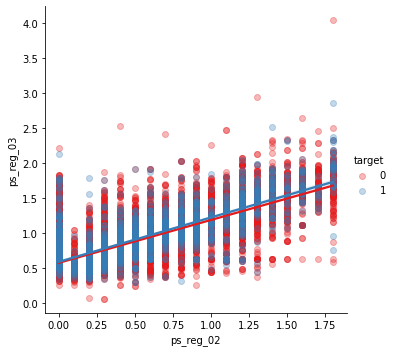

In [ ]:
sns.lmplot(x='ps_reg_02', y='ps_reg_03', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

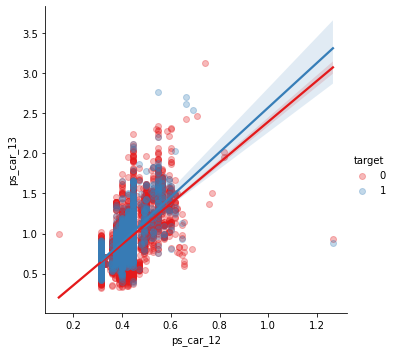

In [ ]:
sns.lmplot(x='ps_car_12', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

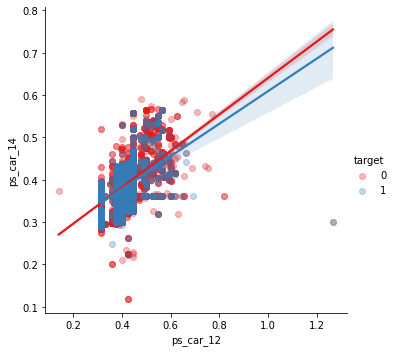

In [ ]:
sns.lmplot(x='ps_car_12', y='ps_car_14', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

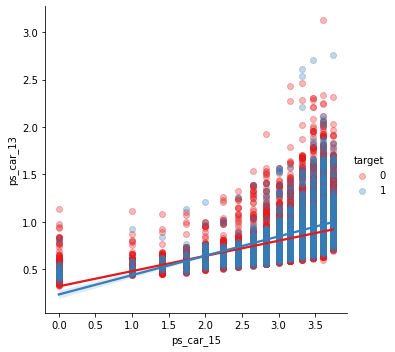

In [ ]:
sns.lmplot(x='ps_car_15', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

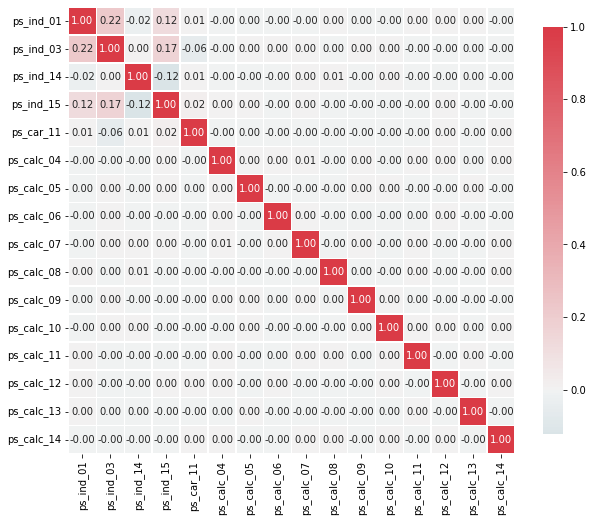

In [ ]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
corr_heatmap(v)

# Feature engineering

## creating dummy variables

In [ ]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index
print('Before dummification we have {} variables in train'.format(train.shape[1]))
train = pd.get_dummies(train, columns=v, drop_first=True)
print('After dummification we have {} variables in train'.format(train.shape[1]))

Before dummification we have 57 variables in train
After dummification we have 109 variables in train


## Creating interaction variables

In [ ]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
interactions = pd.DataFrame(data=poly.fit_transform(train[v]), columns=poly.get_feature_names(v))
interactions.drop(v, axis=1, inplace = True)

In [ ]:
print('Before creating interactions we have {} variables in train'.format(train.shape[1]))
train = pd.concat([train, interactions], axis = 1)
print('Afrer creating interactions we have {} variables in train'.format(train.shape[1]))

Before creating interactions we have 109 variables in train
Afrer creating interactions we have 164 variables in train


# Feature Selection

## Removing features with low zero variance

In [ ]:
# default it removes feature with less than 1% variance
selector = VarianceThreshold(threshold=.01)
selector.fit(train.drop(['id', 'target'], axis=1))

VarianceThreshold(threshold=0.01)

In [ ]:
# to toggle boolean array elements
f = np.vectorize(lambda x : not x)

In [ ]:
selector.get_support()

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False,  True,  True,  True,
       False,  True,  True, False,  True,  True, False,  True,  True,
        True, False,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
f(selector.get_support())

array([False, False, False, False, False, False,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True, False, False, False,
        True, False, False,  True, False, False,  True, False, False,
       False,  True, False, False, False,  True,  True, False, False,
       False, False, False, False, False,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
~selector.get_support()

array([False, False, False, False, False, False,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True, False, False, False,
        True, False, False,  True, False, False,  True, False, False,
       False,  True, False, False, False,  True,  True, False, False,
       False, False, False, False, False,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
v = train.drop(['id', 'target'], axis=1).columns[f(selector.get_support())]

In [ ]:
print('{} variables have too low variance.'.format(len(v)))
print('These variables are {}'.format(list(v)))

28 variables have too low variance.
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_car_11_cat_te', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2']


We would lose rather many variables if we would select based on variance.

## Selecting features with a Random Forest and SelecFromModel

 With Sklearn's SelectFromModel you can then specify how many variables you want to keep. 
 You can set a threshold on the level of feature importance manually. 
 But we'll simply select the top 50% best variables.
 

In [ ]:
X_train = train.drop(['id', 'target'], axis=1)
y_train = train['target']
feat_labels  = X_train.columns
# 시간 관계상 tree 10개
rf = RandomForestClassifier(n_estimators=10, random_state=0, n_jobs=-1)
# 데이터 1000개만
rf.fit(X_train[:1000], y_train[:1000])
importances = rf.feature_importances_
indices = np.argsort(rf.feature_importances_)[::-1]

In [ ]:
for f in range(X_train.shape[1]):
  print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) ps_calc_03^2                   0.000000
 2) ps_calc_18_bin                 0.000000
 3) ps_car_01_cat_1                0.000000
 4) ps_car_01_cat_0                0.000000
 5) ps_ind_05_cat_6                0.000000
 6) ps_ind_05_cat_5                0.000000
 7) ps_ind_05_cat_4                0.000000
 8) ps_ind_05_cat_3                0.000000
 9) ps_ind_05_cat_2                0.000000
10) ps_ind_05_cat_1                0.000000
11) ps_ind_05_cat_0                0.000000
12) ps_ind_04_cat_1                0.000000
13) ps_ind_04_cat_0                0.000000
14) ps_ind_02_cat_4                0.000000
15) ps_ind_02_cat_3                0.000000
16) ps_ind_02_cat_2                0.000000
17) ps_ind_02_cat_1                0.000000
18) ps_car_11_cat_te               0.000000
19) ps_calc_20_bin                 0.000000
20) ps_car_01_cat_2                0.000000
21) ps_car_01_cat_3                0.000000
22) ps_car_01_cat_4                0.000000
23) ps_car_04_cat_1             

ps_car_11_cat_te 값이 가장 큼 -> target encoding 값이 가장 크다


In [ ]:
sfm = SelectFromModel(rf, threshold='median', prefit=True)
print('Number of features before selection: {}'.format(X_train.shape[1]))

Number of features before selection: 162


In [ ]:
n_features = sfm.transform(X_train).shape[1]
print('Number of features after selection: {}'.format(n_features))

Number of features after selection: 162


In [ ]:
selected_vars = list(feat_labels[sfm.get_support()])

In [ ]:
train = train[selected_vars + ['target']]

# Feature scailing

In [ ]:
scaler = StandardScaler()
scaler.fit_transform(train.drop(['target'], axis=1))

array([[-0.45941104, -1.26665356,  1.25877984, ..., -0.72553616,
        -1.01071913, -1.06173767],
       [ 1.55538958,  0.95034274,  1.25877984, ..., -1.06120876,
        -1.01071913,  0.27907892],
       [ 1.05168943, -0.52765479,  1.25877984, ...,  1.95984463,
        -0.56215309, -1.02449277],
       ...,
       [-0.9631112 ,  0.58084336, -0.7944201 , ..., -0.46445747,
         0.18545696,  0.27907892],
       [-0.9631112 , -0.89715418,  1.25877984, ..., -0.91202093,
        -0.41263108,  0.27907892],
       [-0.45941104, -1.26665356, -0.7944201 , ...,  0.28148164,
        -0.11358706, -0.72653353]])